

# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This is a large data set containing details about movies and various features associated with it, until the year 2015. The data set is made up of the following Columns/fields:
id,
imdb_id,
popularity,
budget,
revenue,
original_title,
cast,
homepage,
director,
tagline,
keywords,
overview,
runtime,
genres,
production_companies,
release_date,
vote_count,
vote_average,
release_year,
budget_adj,
and revenue_adj.

> Using the above data, we intend to answer the following questions :
1. Is Revenue related to Ratings?
2. Which Directors have produced the best movies of 2015 based on Ratings?

In [98]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

df = pd.read_csv('tmdb-movies.csv')
df.head()

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [99]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [100]:
# Visualizing the dimensions of the dataframe
df.shape

(10866, 21)

In [101]:
# Obtaining additional information about the columns associated with the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [102]:
# Getting a general description of dataframe from statistical point-of-view
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Preping the Data for Analysis (Data Cleaning)

In [103]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [104]:
# Let us create a function "discard_columns", aimed at discarding the fields not required for this analysis

def discard_columns():
    # Let us create a list of the columns we do not require for our analysis, as "notrequired"
    notrequired = ['id','imdb_id','homepage','tagline','keywords','overview','release_date']
    # Drop the unnecessary columns/fields from the database
    df.drop(notrequired,axis=1,inplace=True)

In [105]:
# calling the "discard_columns" function defined previously
discard_columns()

In [106]:
# Checking the updated Data
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [107]:
# Verifying the dimensions of the updated Data
df.shape

(10866, 14)

In [108]:
# Filtering the duplicated entries in the Data
df[df.duplicated()==True]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010,30000000.0,967000.0


In [109]:
# Removing the duplicate entries
df.drop_duplicates(inplace=True)

In [110]:
# Rechecking for Duplicates
df[df.duplicated()==True]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [111]:
# Finding the sum or count of Duplicates
print(df.duplicated().sum())

0


In [112]:
# Finding the count of Missing or Null Values for each column
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [113]:
# Dropping the entries with missing values for proper Data Analysis
# Note : Here we drp the data coz there is no way to fill these empty values, such that they would make sense to the Data
df.dropna(inplace=True)

In [114]:
# Verifying whether the entries have been dropped by checking the count of Null Values
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1 : Is Revenue related to rating?

In [115]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


# Here we will try to visualize the relationships between 'Revenue','Rating' and 'Popularity'

def plot_box(feature):
    df.boxplot(feature, vert=False,showfliers=False)

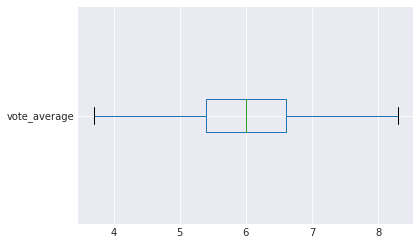

In [116]:
# Visualizing the distribution of Ratings.
plot_box('vote_average')

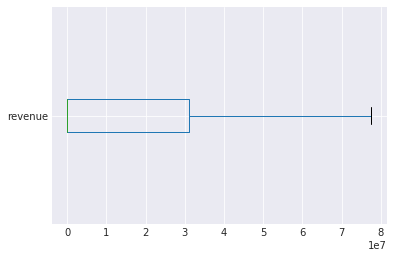

In [117]:
# Visualizing the distribution of Revenue.
plot_box('revenue')

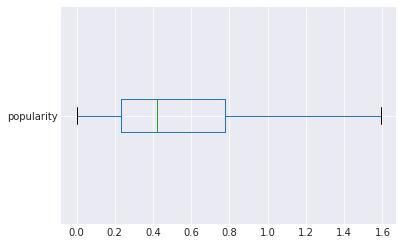

In [118]:
# Visualizing the distribution of Popularity.
plot_box('popularity')

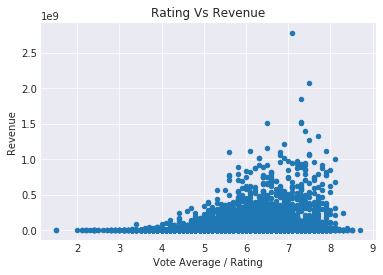

In [119]:
# Scatter plot of Revenue vs Ratings
df.plot(x='vote_average',y='revenue',kind='scatter')
plt.title('Rating Vs Revenue')
plt.xlabel('Vote Average / Rating')
plt.ylabel('Revenue');

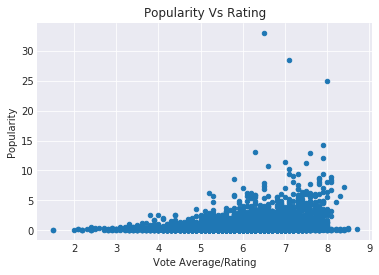

In [135]:
# Scatter plot of Popularity vs Ratings
df.plot(x='vote_average',y='popularity',kind='scatter')
plt.title('Popularity Vs Rating')
plt.xlabel('Vote Average/Rating')
plt.ylabel('Popularity');

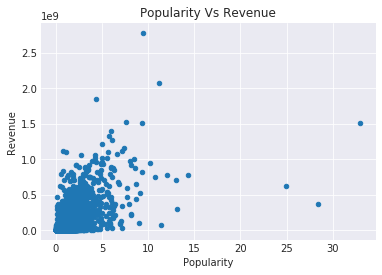

In [121]:
# Scatter plot of Revenue vs Popularity
df.plot(x='popularity',y='revenue',kind='scatter')
plt.title('Popularity Vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue');

#### Here we were clearly able to visualize the Relationships between the said parameters.

### Question 2 : Which Director has produced the best movies in 2015?

In [122]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# We will try to answer this question by finding the top 5 Directors for 2015 based on Movie Ratings.

In [123]:
# Filtering the dataset to movies released in 2015 alone
df_dir=df[df['release_year'] == 2015]

In [124]:
# Verifying the Change and Visualizing the data
df_dir.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [125]:
# Checking the dimensions of the Data Set
df_dir.shape

(558, 14)

In [126]:
# Creating a New Dataframe with entries grouped by Director Names 
# along with the mean of different movies released by them in 2015

data = df_dir.groupby('director').mean().vote_average

In [127]:
# Visualizing the Data obtained
data

director
A. Todd Smith                     5.4
Aaron Hann|Mario Miscione         6.1
Aaron Keeling|Austin Keeling      3.8
Aaron Moorhead|Justin Benson      6.5
Adam Brooks|Matthew Kennedy       6.0
Adam Egypt Mortimer               3.9
Adam Green                        5.4
Adam MacDonald                    5.8
Adam Mason                        3.9
Adam Massey                       4.9
Adam McKay                        7.3
Adam Salky                        5.7
Adam Schindler                    5.8
Afonso Poyart                     6.2
Aisling Walsh                     7.8
Alan Taylor                       5.8
Alberto Marini                    5.3
Alec Gillis                       4.2
Alejandro AmenÃ¡bar               5.2
Alejandro GonzÃ¡lez IÃ±Ã¡rritu    7.2
Alejandro Monteverde              7.1
Aleksander Bach                   5.5
Alex Garcia Lopez                 4.5
Alex Garland                      7.6
Alex Gibney                       7.0
Alex Kalymnios                    6.3
Ale

In [128]:
def manipulate_data(data1):
    # Sorting the Data in Descending order based on the mean of average ratings of movies corresponding to each director
    data1 = data1.sort_values(ascending=False)  
    # Visualizing the Change
    print(data1)
    # Top 5 Directors
    directors=data1.index[:5]
    print(directors)
    return data1

In [129]:
data = manipulate_data(data)
print(data)

director
Andrew Jarecki                                  8.4
Don Hertzfeldt                                  8.2
Mark Neale                                      8.0
Douglas Mackinnon                               8.0
Lenny Abrahamson                                8.0
Pete Docter                                     8.0
Neil Armfield                                   7.9
Tom McCarthy                                    7.8
Aisling Walsh                                   7.8
Jared P. Scott|Peter D. Hutchison|Kelly Nyks    7.8
Louis C.K.                                      7.7
F. Gary Gray                                    7.7
David Sandberg                                  7.7
Mike Thurmeier|Galen T. Chu                     7.7
Liz Garbus                                      7.7
Alfonso Gomez-Rejon                             7.7
Atom Egoyan                                     7.7
Craig Viveiros                                  7.7
Ridley Scott                                    7.6
Ale

In [130]:
for i in data.index[:5]:
    print(i)

Andrew Jarecki
Don Hertzfeldt
Mark Neale
Douglas Mackinnon
Lenny Abrahamson


In [131]:
# Top 5 Means of Average Ratings

data.values[:5]

array([ 8.4,  8.2,  8. ,  8. ,  8. ])

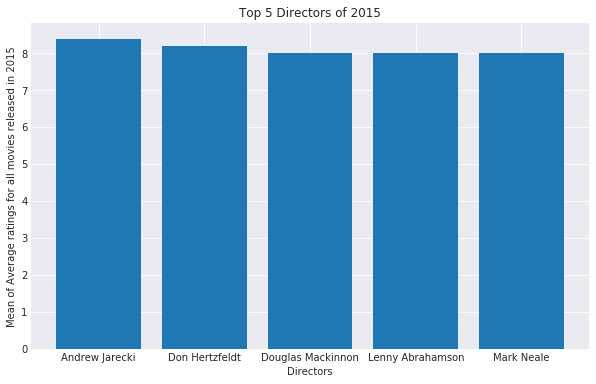

In [132]:
# Plotting the Bar Graph for Top 5 Directors aginst the mean of their average ratings of movies released in 2015.

plt.subplots(figsize=(10,6))
plt.bar(data.index[:5],data[:5])
plt.title('Top 5 Directors of 2015')
plt.xlabel('Directors')
plt.ylabel('Mean of Average ratings for all movies released in 2015');

<a id='conclusions'></a>
## Conclusions

> **Question 1**: As seen from the various scatter plots, we can easily conclude that Revenue and Popularity are directly proportional. The Revenue increases with increase in Popularity (which is but obvious.) We also visualize the right-biased normal distributions for relationship between Revenue Vs Rating and Popularity Vs Rating.

>> Limitations : Here we faces various limitations. Firstly there were many entries within the dataframe which contained a certain amount of null values. So, first we had to discard those entries. Furthermore, the data also contained some duplicated values, which had to be removed, following a re-check of null values for our key parameters.

> **Question 2**: As observed from the process above, we are clearly able to list out the top 5 Directors of 2015 based on the mean calculated for the average ratings of various movies released by them in 2015. Hence, we can conclude that, 'Andrew Jarecki' with a mean average rating of '8.4', wins the top spot.

>> Limitations : Here we faces various limitations. Firstly there were many entries within the filtered dataframe containing data corresponding to movies released in 2015, having null values. So, first we had to discard those entries. Furthermore, for the analysis we aimed to do for answering the above question, didn't require many irrelevant fields present in the data. Hence, we discarded the irrelevant fields. 

In [133]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0